<a href="https://colab.research.google.com/github/anisfreelancer71/mycode/blob/main/CLEANSING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!ls '/content/drive/My Drive/filecsv'

 creditcard.csv		       'Sales_June_2019 (1).csv'
 data_harga_rumah.csv	        Sales_June_2019.csv
'Financials (1).csv'	       'Sales_March_2019 (1).csv'
'Financials (2).csv'	        Sales_March_2019.csv
'Financials (3).csv'	       'Sales_May_2019 (1).csv'
 Financials.csv		       'Sales_May_2019 (2).csv'
 lc_2016_2017.csv	        Sales_May_2019.csv
 Sales_April_2019.csv	       'Sales_November_2019 (1).csv'
 Sales_August_2019.csv	        Sales_November_2019.csv
'Sales_December_2019 (1).csv'  'Sales_October_2019 (1).csv'
 Sales_December_2019.csv       'Sales_October_2019 (2).csv'
 Sales_February_2019.csv        Sales_October_2019.csv
'Sales_January_2019 (1).csv'    Sales_September_2019.csv
 Sales_January_2019.csv         shopping_data.csv
 Sales_July_2019.csv


In [8]:
import pandas as pd

dataku = pd.read_csv('/content/drive/My Drive/filecsv/shopping_data.csv')
dataku_df = pd.DataFrame(dataku)
print('Shopping Data :\n', dataku_df.head())

Shopping Data :
    CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [9]:
dataku_df.value_counts(['Genre']) #mengitung unik dari kolom

Genre 
Female    112
Male       88
dtype: int64

In [10]:
dataku_df['Genre'] = dataku_df['Genre'].replace({'Female':0, 'Male':1}) # mengganti nilai
dataku_df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [11]:
dataku_df.dropna(inplace=True) # menghapus nilai NAN
dataku_df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [12]:
dataku_df.describe()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


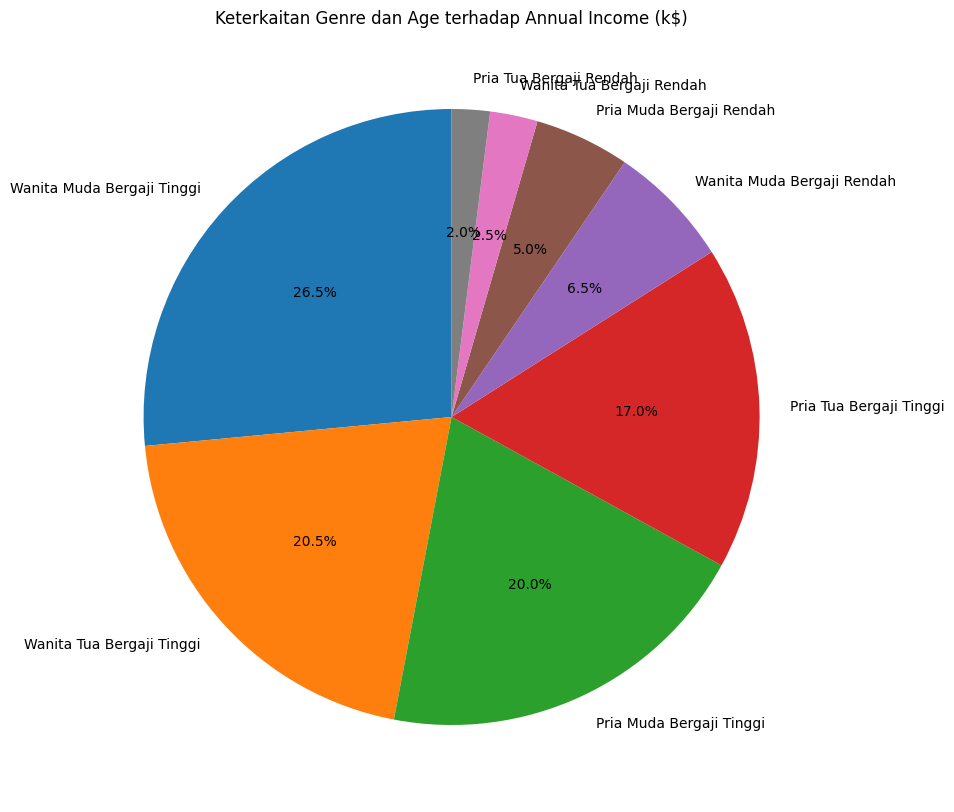

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Anda (saya asumsikan Anda sudah memiliki DataFrame 'dataku_df')
# Jika tidak, Anda perlu memuat data terlebih dahulu

# Membuat kategori berdasarkan kondisi yang telah Anda sebutkan
def create_category(row):
    if row['Genre'] == 0:
        if row['Age'] < 40:
            if row['Annual Income (k$)'] > 30:
                return 'Wanita Muda Bergaji Tinggi'
            else:
                return 'Wanita Muda Bergaji Rendah'
        else:
            if row['Annual Income (k$)'] > 30:
                return 'Wanita Tua Bergaji Tinggi'
            else:
                return 'Wanita Tua Bergaji Rendah'
    else:
        if row['Age'] < 40:
            if row['Annual Income (k$)'] > 30:
                return 'Pria Muda Bergaji Tinggi'
            else:
                return 'Pria Muda Bergaji Rendah'
        else:
            if row['Annual Income (k$)'] > 30:
                return 'Pria Tua Bergaji Tinggi'
            else:
                return 'Pria Tua Bergaji Rendah'

# Menambahkan kolom 'Kategori' ke DataFrame berdasarkan kondisi
dataku_df['Kategori'] = dataku_df.apply(create_category, axis=1)

# Menghitung jumlah data dalam setiap kategori
category_counts = dataku_df['Kategori'].value_counts()

# Membuat pie chart
plt.figure(figsize=(10, 10))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Keterkaitan Genre dan Age terhadap Annual Income (k$)')

plt.show()



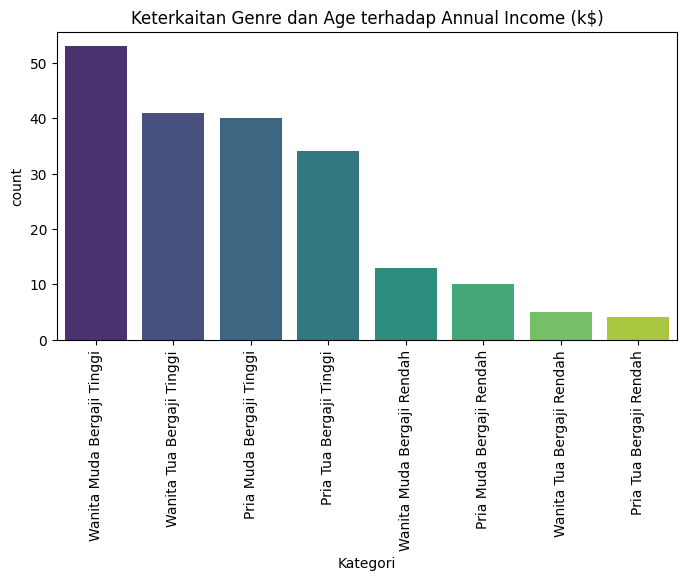

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Anda (saya asumsikan Anda sudah memiliki DataFrame 'dataku_df')
# Jika tidak, Anda perlu memuat data terlebih dahulu

# Membuat kategori berdasarkan kondisi yang telah Anda sebutkan
def create_category(row):
    if row['Genre'] == 0:
        if row['Age'] < 40:
            if row['Annual Income (k$)'] > 30:
                return 'Wanita Muda Bergaji Tinggi'
            else:
                return 'Wanita Muda Bergaji Rendah'
        else:
            if row['Annual Income (k$)'] > 30:
                return 'Wanita Tua Bergaji Tinggi'
            else:
                return 'Wanita Tua Bergaji Rendah'
    else:
        if row['Age'] < 40:
            if row['Annual Income (k$)'] > 30:
                return 'Pria Muda Bergaji Tinggi'
            else:
                return 'Pria Muda Bergaji Rendah'
        else:
            if row['Annual Income (k$)'] > 30:
                return 'Pria Tua Bergaji Tinggi'
            else:
                return 'Pria Tua Bergaji Rendah'

# Menambahkan kolom 'Kategori' ke DataFrame berdasarkan kondisi
dataku_df['Kategori'] = dataku_df.apply(create_category, axis=1)

# Menggunakan Seaborn untuk membuat grafik batang
plt.figure(figsize=(8, 4))
sns.countplot(data=dataku_df, x='Kategori', order=dataku_df['Kategori'].value_counts().index, palette='viridis')
plt.xticks(rotation=90)
plt.title('Keterkaitan Genre dan Age terhadap Annual Income (k$)')

plt.show()



#Membuat BOX PLOT SEABORN

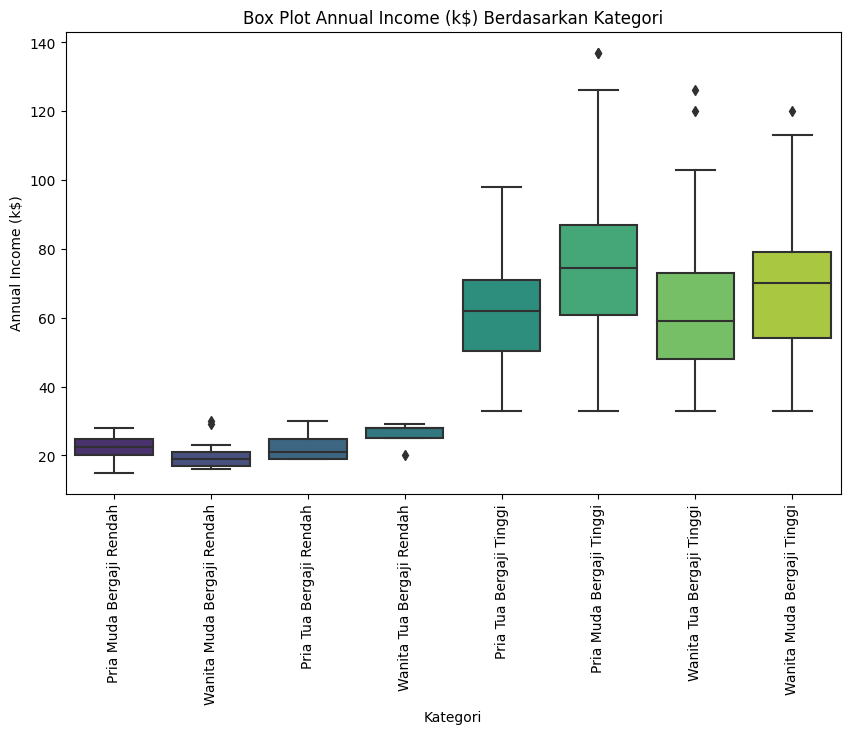

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Anda (saya asumsikan Anda sudah memiliki DataFrame 'dataku_df')
# Jika tidak, Anda perlu memuat data terlebih dahulu

# Membuat kategori berdasarkan kondisi yang telah Anda sebutkan
def create_category(row):
    if row['Genre'] == 0:
        if row['Age'] < 40:
            if row['Annual Income (k$)'] > 30:
                return 'Wanita Muda Bergaji Tinggi'
            else:
                return 'Wanita Muda Bergaji Rendah'
        else:
            if row['Annual Income (k$)'] > 30:
                return 'Wanita Tua Bergaji Tinggi'
            else:
                return 'Wanita Tua Bergaji Rendah'
    else:
        if row['Age'] < 40:
            if row['Annual Income (k$)'] > 30:
                return 'Pria Muda Bergaji Tinggi'
            else:
                return 'Pria Muda Bergaji Rendah'
        else:
            if row['Annual Income (k$)'] > 30:
                return 'Pria Tua Bergaji Tinggi'
            else:
                return 'Pria Tua Bergaji Rendah'

# Menambahkan kolom 'Kategori' ke DataFrame berdasarkan kondisi
dataku_df['Kategori'] = dataku_df.apply(create_category, axis=1)

# Menggunakan Seaborn untuk membuat box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataku_df, x='Kategori', y='Annual Income (k$)', palette='viridis')
plt.xticks(rotation=90)
plt.title('Box Plot Annual Income (k$) Berdasarkan Kategori')

plt.show()


#Membuat PLOT SCATTER

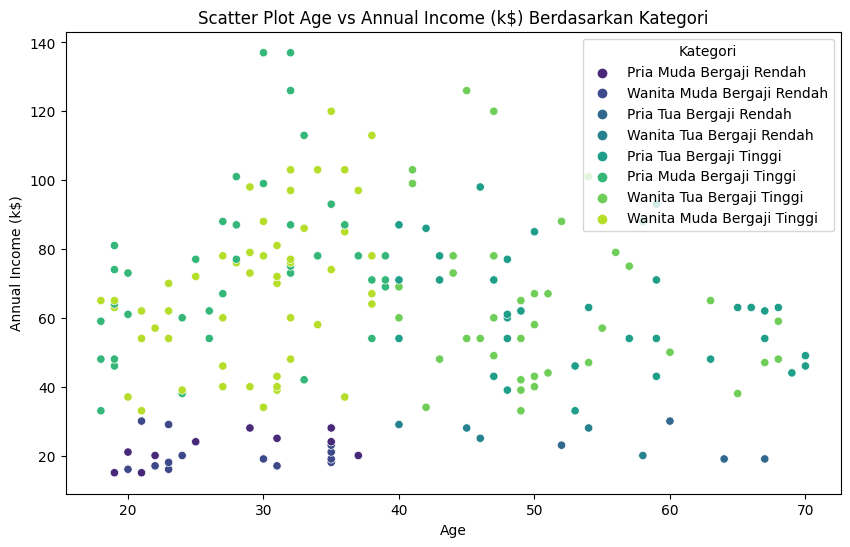

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Anda (saya asumsikan Anda sudah memiliki DataFrame 'dataku_df')
# Jika tidak, Anda perlu memuat data terlebih dahulu

# Membuat kategori berdasarkan kondisi yang telah Anda sebutkan
def create_category(row):
    if row['Genre'] == 0:
        if row['Age'] < 40:
            if row['Annual Income (k$)'] > 30:
                return 'Wanita Muda Bergaji Tinggi'
            else:
                return 'Wanita Muda Bergaji Rendah'
        else:
            if row['Annual Income (k$)'] > 30:
                return 'Wanita Tua Bergaji Tinggi'
            else:
                return 'Wanita Tua Bergaji Rendah'
    else:
        if row['Age'] < 40:
            if row['Annual Income (k$)'] > 30:
                return 'Pria Muda Bergaji Tinggi'
            else:
                return 'Pria Muda Bergaji Rendah'
        else:
            if row['Annual Income (k$)'] > 30:
                return 'Pria Tua Bergaji Tinggi'
            else:
                return 'Pria Tua Bergaji Rendah'

# Menambahkan kolom 'Kategori' ke DataFrame berdasarkan kondisi
dataku_df['Kategori'] = dataku_df.apply(create_category, axis=1)

# Menggunakan Seaborn untuk membuat scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataku_df, x='Age', y='Annual Income (k$)', hue='Kategori', palette='viridis')
plt.title('Scatter Plot Age vs Annual Income (k$) Berdasarkan Kategori')

plt.show()


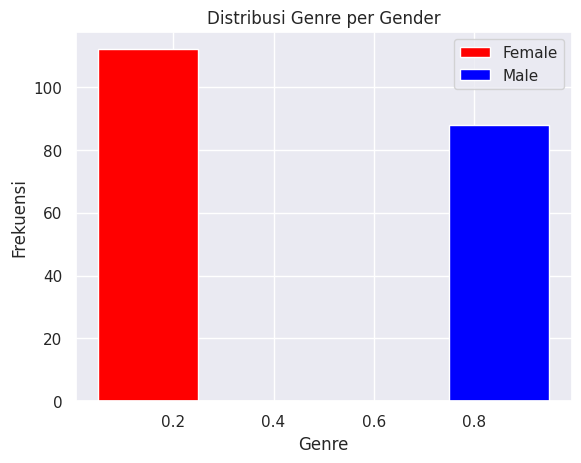

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Membaca data dari file CSV
dataku = pd.read_csv('/content/drive/My Drive/filecsv/shopping_data.csv')
dataku_df = pd.DataFrame(dataku)

# Mengubah kolom Genre menjadi biner
dataku_df['Genre'] = dataku_df['Genre'].replace({'Female': 0, 'Male': 1})

# Membuat histogram dengan warna berbeda untuk nilai biner (0 dan 1)
plt.hist([dataku_df[dataku_df['Genre'] == 0]['Genre'], dataku_df[dataku_df['Genre'] == 1]['Genre']],
         bins=2, color=['red', 'blue'], label=['Female', 'Male'])

plt.title('Distribusi Genre per Gender')
plt.xlabel('Genre')
plt.ylabel('Frekuensi')
plt.grid(True)

plt.legend()
plt.show()

#Untuk melakukan data mining :
dengan membagi variabel independen (X) dan variabel dependen (y) dari data Anda, Anda dapat menggunakan Python dan pustaka seperti pandas. Di bawah ini adalah contoh cara melakukannya:

In [70]:
import pandas as pd

# Data Anda (saya asumsikan Anda sudah memiliki DataFrame 'dataku_df')
# Jika tidak, Anda perlu memuat data terlebih dahulu

# Memisahkan variabel independen (X) dan variabel dependen (y)
X = dataku_df[['Age', 'Annual Income (k$)']]
y = dataku_df['Spending Score (1-100)']

# Menampilkan beberapa contoh data
print("Variabel Independen (X):")
print(X.head())

print("\nVariabel Dependen (y):")
print(y.head())


Variabel Independen (X):
   Age  Annual Income (k$)
0   19                  15
1   21                  15
2   20                  16
3   23                  16
4   31                  17

Variabel Dependen (y):
0    39
1    81
2     6
3    77
4    40
Name: Spending Score (1-100), dtype: int64


#membagi data
menjadi set pelatihan (training set) dan set pengujian (testing set), Anda dapat menggunakan pustaka scikit-learn. Berikut adalah contoh cara membagi data menjadi X_train, y_train (set pelatihan) dan X_test, y_test (set pengujian):

In [71]:
from sklearn.model_selection import train_test_split

# Memisahkan data menjadi set pelatihan (70%) dan set pengujian (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan jumlah data dalam set pelatihan dan set pengujian
print("Jumlah data dalam set pelatihan (X_train, y_train):", X_train.shape[0])
print("Jumlah data dalam set pengujian (X_test, y_test):", X_test.shape[0])


Jumlah data dalam set pelatihan (X_train, y_train): 160
Jumlah data dalam set pengujian (X_test, y_test): 40


In [72]:
from sklearn.linear_model import LinearRegression

# Inisialisasi model regresi linier
model = LinearRegression()

# Melatih model dengan data pelatihan
model.fit(X_train, y_train)



LinearRegression()

In [73]:
# Menggunakan model untuk membuat prediksi pada data pengujian
y_pred = model.predict(X_test)

# Menampilkan hasil prediksi
print("Hasil Prediksi:")
print(y_pred)

Hasil Prediksi:
[60.53107371 59.61532685 37.74581617 55.58060323 40.4817971  63.7393247
 55.18843905 52.51607607 45.49693117 59.43155008 48.70622782 49.55626543
 54.76852725 60.80621603 44.99900479 60.22922943 43.7824593  49.68768393
 34.8773711  62.84923415 61.64394832 52.00689002 55.58060323 51.10240283
 63.43852608 32.69062916 61.98479989 33.97392956 56.92961288 60.570081
 54.84863314 42.09364374 46.08726875 59.03834024 50.27697586 45.90349199
 58.26527155 56.49739575 46.51844023 47.84179356]


#evaluasi model regresi linier
  Anda dapat menggunakan berbagai metrik evaluasi yang umum digunakan seperti Mean Absolute Error (MAE), Mean Squared Error (MSE), dan Root Mean Squared Error (RMSE). Berikut adalah contoh cara melakukan evaluasi model dengan menggunakan metrik-metrik tersebut:

In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Menghitung MAE, MSE, dan RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 18.228973408316737
Mean Squared Error (MSE): 483.5568217540833
Root Mean Squared Error (RMSE): 21.98992546040307


In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Inisialisasi model RandomForest untuk klasifikasi
clf = RandomForestClassifier(random_state=42)

# Melatih model dengan data pelatihan
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [76]:
# Menggunakan model untuk membuat prediksi pada data pengujian
y_pred_classification = clf.predict(X_test)

# Mengukur akurasi
accuracy = accuracy_score(y_test, y_pred_classification)

print("Akurasi Model RandomForest:", accuracy)

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Menghitung MAE, MSE, dan RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Akurasi Model RandomForest: 0.0
Mean Absolute Error (MAE): 18.228973408316737
Mean Squared Error (MSE): 483.5568217540833
Root Mean Squared Error (RMSE): 21.98992546040307


In [77]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Inisialisasi model Decision Tree untuk regresi
regressor = DecisionTreeRegressor(random_state=42)

# Melatih model dengan data pelatihan
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [78]:
# Menggunakan model untuk membuat prediksi pada data pengujian
y_pred_regression = regressor.predict(X_test)

# Mengukur metrik evaluasi regresi (MAE, MSE, RMSE)
mae_tree = mean_absolute_error(y_test, y_pred_regression)
mse_tree = mean_squared_error(y_test, y_pred_regression)
rmse_tree = np.sqrt(mse_tree)

print("Mean Absolute Error (MAE) - Decision Tree:", mae_tree)
print("Mean Squared Error (MSE) - Decision Tree:", mse_tree)
print("Root Mean Squared Error (RMSE) - Decision Tree:", rmse_tree)

Mean Absolute Error (MAE) - Decision Tree: 17.175
Mean Squared Error (MSE) - Decision Tree: 764.675
Root Mean Squared Error (RMSE) - Decision Tree: 27.652757547846832


In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Inisialisasi model regresi linier
model_linier = LinearRegression()

# Melatih model dengan data pelatihan
model_linier.fit(X_train, y_train)


LinearRegression()

In [80]:
# Menggunakan model untuk membuat prediksi pada data pengujian
y_pred_linier = model_linier.predict(X_test)

# Mengukur metrik evaluasi regresi (MAE, MSE, RMSE)
mae_linier = mean_absolute_error(y_test, y_pred_linier)
mse_linier = mean_squared_error(y_test, y_pred_linier)
rmse_linier = np.sqrt(mse_linier)

print("Mean Absolute Error (MAE) - Linear Regression:", mae_linier)
print("Mean Squared Error (MSE) - Linear Regression:", mse_linier)
print("Root Mean Squared Error (RMSE) - Linear Regression:", rmse_linier)


Mean Absolute Error (MAE) - Linear Regression: 18.228973408316737
Mean Squared Error (MSE) - Linear Regression: 483.5568217540833
Root Mean Squared Error (RMSE) - Linear Regression: 21.98992546040307


In [81]:
#melihat nilai mim dan max
print('Nila minimal:\n', dataku_df.min())
print('Nila maksimal:\n', dataku_df.max())
print('Nila Rata rata:\n', dataku_df.mean())

Nila minimal:
 CustomerID                   1
Genre                        0
Age                         18
Annual Income (k$)          15
Spending Score (1-100)       1
Age_Group                 Muda
Age_Category              Muda
dtype: object
Nila maksimal:
 CustomerID                200
Genre                       1
Age                        70
Annual Income (k$)        137
Spending Score (1-100)     99
Age_Group                 Tua
Age_Category              Tua
dtype: object
Nila Rata rata:
 CustomerID                100.50
Genre                       0.44
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64


<ipython-input-81-3f972a093b0e>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('Nila Rata rata:\n', dataku_df.mean())


In [82]:
# Membuat fitur baru "Age_Group"
dataku_df['Age_Group'] = np.where(dataku_df['Age'] <= 30, 'Muda', 'Tua')


In [83]:
# Membuat kategori usia
bins = [0, 30, 50, float('inf')]
labels = ['Muda', 'Sedang', 'Tua']
dataku_df['Age_Category'] = pd.cut(dataku_df['Age'], bins=bins, labels=labels, right=False)


In [84]:
X_train = dataku_df[['Genre', 'Age_Group', 'Annual Income (k$)']]
X_test = dataku_df[['Genre', 'Age_Group', 'Annual Income (k$)']]


In [85]:
X_train = dataku_df[['Genre', 'Age_Category', 'Annual Income (k$)']]
X_test = dataku_df[['Genre', 'Age_Category', 'Annual Income (k$)']]


In [86]:
from sklearn.model_selection import train_test_split

# Memisahkan data menjadi set pelatihan (70%) dan set pengujian (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Melatih Model:
Gunakan data pelatihan (X_train dan y_train) untuk melatih model Anda. Anda dapat menggunakan model regresi yang telah Anda pilih sebelumnya, seperti model Linear Regression atau Decision Tree Regression. Contoh untuk melatih model Linear Regression:

In [87]:
from sklearn.linear_model import LinearRegression

# Inisialisasi model Linear Regression
model_linier = LinearRegression()

# Melatih model dengan data pelatihan
model_linier.fit(X_train, y_train)


LinearRegression()

#Membuat Prediksi:
Setelah model dilatih, Anda dapat menggunakan model tersebut untuk membuat prediksi pada data pengujian (X_test). Contoh:

In [88]:
# Menggunakan model untuk membuat prediksi pada data pengujian
y_pred_linier = model_linier.predict(X_test)


#Evaluasi Model:
 Evaluasi model Anda dengan menggunakan metrik evaluasi yang sesuai untuk regresi, seperti Mean Absolute Error (MAE), Mean Squared Error (MSE), atau Root Mean Squared Error (RMSE). Anda dapat menggunakan kode berikut untuk mengukur performa model:

In [89]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Mengukur metrik evaluasi regresi (MAE, MSE, RMSE)
mae_linier = mean_absolute_error(y_test, y_pred_linier)
mse_linier = mean_squared_error(y_test, y_pred_linier)
rmse_linier = np.sqrt(mse_linier)

print("Mean Absolute Error (MAE) - Linear Regression:", mae_linier)
print("Mean Squared Error (MSE) - Linear Regression:", mse_linier)
print("Root Mean Squared Error (RMSE) - Linear Regression:", rmse_linier)


Mean Absolute Error (MAE) - Linear Regression: 18.228973408316737
Mean Squared Error (MSE) - Linear Regression: 483.5568217540833
Root Mean Squared Error (RMSE) - Linear Regression: 21.98992546040307
